In [157]:
import sys
import importlib
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
if sys.path[-1] != "..": sys.path.append("..")
import model
from common import cosmology, rh_neutrino, constants, constraints
model = importlib.reload(model)
cosmology = importlib.reload(cosmology)
from common import util

# Interesting Field Evolutions -> I had (have?) a numerical problem

In [162]:
# problem: f_a = chi0 = 1e10, small m's, Gamma_phi = H_inf, g = 1e-3 
# ===> numerical problem, curves should be the same but aren't
f_a = 3e9
chi0 = 1e9
m_chi = 1e-2 # this should be irrelevant
m_a = 1e-2 # this should be irrelevant 
H_inf = max(constraints.calc_H_inf_max(f_a), constraints.calc_H_inf_max(chi0))
assert m_chi < H_inf
assert m_a < H_inf
Gamma_phi = H_inf
g = 1e-2
# %time sol = model.compute_B_asymmetry(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, g=g)
%time sol = model.simulate(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, g) # , solver="RK45")

CPU times: user 18.7 s, sys: 0 ns, total: 18.7 s
Wall time: 18.7 s


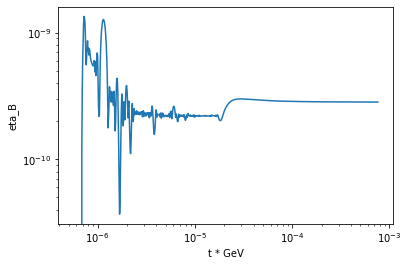

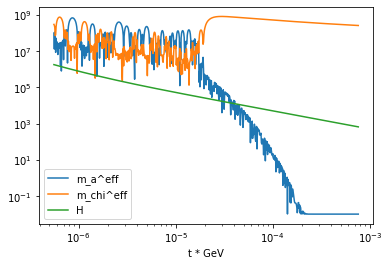

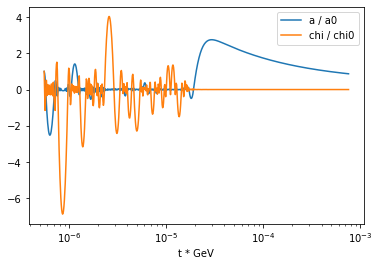

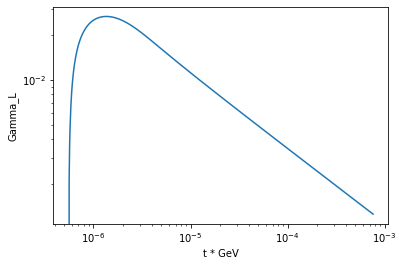

In [165]:
plt.loglog(sol.t, -cosmology.n_L_to_eta_B_final(sol.T, sol.n_L))
plt.xlabel("t * GeV")
plt.ylabel("eta_B")
plt.show()
plt.loglog(sol.t, 0*sol.t + np.sqrt(m_a**2 + g*sol.chi**2),  label="m_a^eff")
plt.loglog(sol.t, 0*sol.t + np.sqrt(m_chi**2 + g*sol.theta**2 * f_a**2), label="m_chi^eff")
plt.loglog(sol.t, sol.H, label="H")
plt.legend()
plt.xlabel("t * GeV")
plt.show()
plt.semilogx(sol.t, sol.theta, label="a / a0")
plt.semilogx(sol.t, sol.chi / chi0, label="chi / chi0")
plt.legend()
plt.xlabel("t * GeV")
plt.show()
plt.loglog(sol.t, model.calc_Gamma_L(sol.T, model.paper_sigma_eff) / sol.H)
plt.xlabel("t * GeV")
plt.ylabel("Gamma_L / H")
plt.show()

# f_a, g Plane

In [166]:
f_a_range = np.geomspace(1e6, 1e9, 10)
g_range = np.geomspace(1e-4, 1e-3, 10) 
chi0 = 1e9
m_chi = 1e-2 # this should be irrelevant
m_a = 1e-2 # this should be irrelevant 
def f(f_a, g):
    print(f_a, g)
    H_inf = max(constraints.calc_H_inf_max(f_a), constraints.calc_H_inf_max(chi0))
    assert m_chi < H_inf
    assert m_a < H_inf
    Gamma_phi = H_inf
    return model.compute_B_asymmetry(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, g)
eta_B_s = np.array([[f(f_a, g) for f_a in f_a_range] for g in tqdm(g_range)])

1000000.0 0.0001
2154434.6900318824 0.0001
4641588.833612782 0.0001
10000000.0 0.0001
21544346.900318824 0.0001
46415888.33612773 0.0001
100000000.0 0.0001
215443469.00318778 0.0001
464158883.3612773 0.0001
1000000000.0 0.0001
1000000.0 0.0001291549665014884
2154434.6900318824 0.0001291549665014884
4641588.833612782 0.0001291549665014884
10000000.0 0.0001291549665014884
21544346.900318824 0.0001291549665014884
46415888.33612773 0.0001291549665014884
100000000.0 0.0001291549665014884
215443469.00318778 0.0001291549665014884
464158883.3612773 0.0001291549665014884
1000000000.0 0.0001291549665014884
1000000.0 0.0001668100537200059
2154434.6900318824 0.0001668100537200059
4641588.833612782 0.0001668100537200059
10000000.0 0.0001668100537200059
21544346.900318824 0.0001668100537200059
46415888.33612773 0.0001668100537200059
100000000.0 0.0001668100537200059
215443469.00318778 0.0001668100537200059
464158883.3612773 0.0001668100537200059
1000000000.0 0.0001668100537200059
1000000.0 0.0002154

In [167]:
util.save_data("two_field_f_a_g.pkl", m_a, m_chi, chi0, f_a_range, g_range, eta_B_s)

Text(0.5, 1.0, 'chi0 = 1.00e+09 GeV')

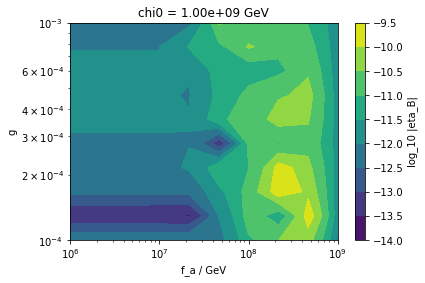

In [170]:
plt.contourf(f_a_range, g_range, np.log10(np.abs(eta_B_s))) # np.arange(-14, -9 + 1, 0.5))
plt.xscale("log"); plt.yscale("log")
plt.xlabel("f_a / GeV"); plt.ylabel("g")
plt.colorbar().set_label("log_10 |eta_B|")
plt.title(f"chi0 = {chi0:.2e} GeV")

# chi0, g Plane

In [173]:
f_a = 1e8
m_chi = 1e-2 # this should be irrelevant
m_a = 1e-2 # this should be irrelevant 
chi0_range = np.geomspace(1e5, 1e9, 10)
g_range = np.geomspace(1e-4, 1e-3, 10) 
def f(chi0, g):
    print(chi0, g)
    H_inf = max(constraints.calc_H_inf_max(f_a), constraints.calc_H_inf_max(chi0))
    assert m_chi < H_inf
    assert m_a < H_inf
    Gamma_phi = H_inf
    return model.compute_B_asymmetry(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, g)
eta_B_s_2 = np.array([[f(chi0, g) for chi0 in chi0_range] for g in tqdm(g_range)])

100000.0 0.0001
278255.94022071257 0.0001
774263.6826811278 0.0001
2154434.6900318824 0.0001
5994842.503189409 0.0001
16681005.372000592 0.0001
46415888.33612773 0.0001
129154966.50148827 0.0001
359381366.3804626 0.0001
1000000000.0 0.0001
100000.0 0.0001291549665014884
278255.94022071257 0.0001291549665014884
774263.6826811278 0.0001291549665014884
2154434.6900318824 0.0001291549665014884
5994842.503189409 0.0001291549665014884
16681005.372000592 0.0001291549665014884
46415888.33612773 0.0001291549665014884
129154966.50148827 0.0001291549665014884
359381366.3804626 0.0001291549665014884
1000000000.0 0.0001291549665014884
100000.0 0.0001668100537200059
278255.94022071257 0.0001668100537200059
774263.6826811278 0.0001668100537200059
2154434.6900318824 0.0001668100537200059
5994842.503189409 0.0001668100537200059
16681005.372000592 0.0001668100537200059
46415888.33612773 0.0001668100537200059
129154966.50148827 0.0001668100537200059
359381366.3804626 0.0001668100537200059
1000000000.0 0.

In [175]:
util.save_data("two_field_chi0_g.pkl", f_a, m_a, m_chi, chi0_range, g_range, eta_B_s_2)

Text(0.5, 1.0, 'f_a = 1.00e+08 GeV')

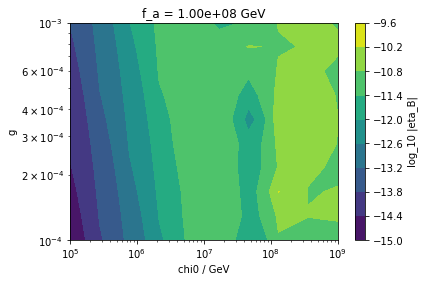

In [174]:
plt.contourf(chi0_range, g_range, np.log10(np.abs(eta_B_s_2))) # np.arange(-14, -9 + 1, 0.5))
plt.xscale("log"); plt.yscale("log")
plt.xlabel("chi0 / GeV"); plt.ylabel("g")
plt.colorbar().set_label("log_10 |eta_B|")
plt.title(f"f_a = {f_a:.2e} GeV")

# f_a, chi0 Plane

In [176]:
m_chi = 1e-2 # this should be irrelevant
m_a = 1e-2 # this should be irrelevant 
chi0_range = np.geomspace(1e6, 1e9, 10)
f_a_range = np.geomspace(1e6, 1e9, 10) 
g = 1e-3
def f(chi0, f_a):
    print(chi0, f_a)
    H_inf = max(constraints.calc_H_inf_max(f_a), constraints.calc_H_inf_max(chi0))
    assert m_chi < H_inf
    assert m_a < H_inf
    Gamma_phi = H_inf
    return model.compute_B_asymmetry(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, g)
eta_B_s_3 = np.array([[f(chi0, f_a) for chi0 in chi0_range] for f_a in tqdm(f_a_range)])

1000000.0 1000000.0
2154434.6900318824 1000000.0
4641588.833612782 1000000.0
10000000.0 1000000.0
21544346.900318824 1000000.0
46415888.33612773 1000000.0
100000000.0 1000000.0
215443469.00318778 1000000.0
464158883.3612773 1000000.0
1000000000.0 1000000.0
1000000.0 2154434.6900318824
2154434.6900318824 2154434.6900318824
4641588.833612782 2154434.6900318824
10000000.0 2154434.6900318824
21544346.900318824 2154434.6900318824
46415888.33612773 2154434.6900318824
100000000.0 2154434.6900318824
215443469.00318778 2154434.6900318824
464158883.3612773 2154434.6900318824
1000000000.0 2154434.6900318824
1000000.0 4641588.833612782
2154434.6900318824 4641588.833612782
4641588.833612782 4641588.833612782
10000000.0 4641588.833612782
21544346.900318824 4641588.833612782
46415888.33612773 4641588.833612782
100000000.0 4641588.833612782
215443469.00318778 4641588.833612782
464158883.3612773 4641588.833612782
1000000000.0 4641588.833612782
1000000.0 10000000.0
2154434.6900318824 10000000.0
4641588.

In [177]:
util.save_data("two_field_f_a_chi0.pkl", m_chi, m_a, g, f_a_range, chi0_range, eta_B_s_3)

Text(0.5, 1.0, 'g = 1.00e-03')

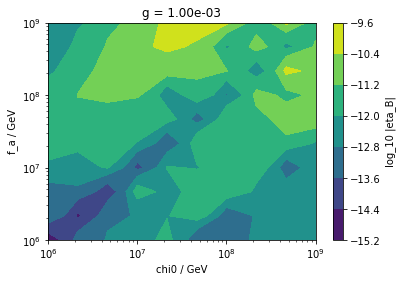

In [183]:
plt.contourf(chi0_range, f_a_range, np.log10(np.abs(eta_B_s_3))) # np.arange(-14, -9 + 1, 0.5))
plt.xscale("log"); plt.yscale("log")
plt.xlabel("chi0 / GeV"); plt.ylabel("f_a / GeV")
plt.colorbar().set_label("log_10 |eta_B|")
plt.title(f"g = {g:.2e}")

# Fixed H_inf

In [132]:
H_inf = 1e9
# minimal field value
field_min = H_inf / 6e-4
m_chi = 1e-2 # this should be irrelevant
m_a = 1e-2 # this should be irrelevant 
chi0 = field_min
f_a = field_min
g = 1e-3
%time sol = model.simulate(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, g, debug=True, converge=False, solver="RK45")

interval: (1e-09, 0.0001) initial conditions: [1.27218101e+02 1.27218101e+02 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 1.66666667e+12 0.00000000e+00] arguments: (600000.0, 0.01, 1e-31, 1666666666666.6667)
CPU times: user 59.8 s, sys: 3.96 ms, total: 59.8 s
Wall time: 59.8 s


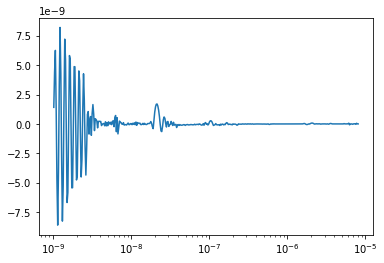

In [135]:
plt.semilogx(sol.t, cosmology.n_L_to_eta_B_final(sol.T, sol.n_L))

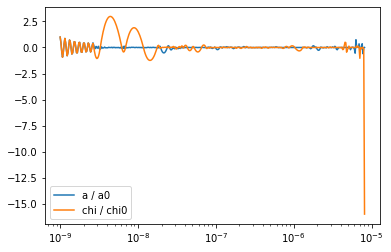

In [134]:
plt.semilogx(sol.t, sol.theta, label="a / a0")
plt.semilogx(sol.t, sol.chi / chi0, label="chi / chi0")
plt.legend()

In [128]:
"%e" % f_a

'1.666667e+12'